In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

import tqdm
import pickle
import time
from swimAD2 import swimAD2 as ad2       # copy swimAD2.py to your working directory
import dwfconstants as dwfc

ad2.disconnect()            # close all instances before connecting
zoroku = ad2.connect(0)      # connect to first(0th) ad2, give it the name 'zoroku'

8192 81920.0


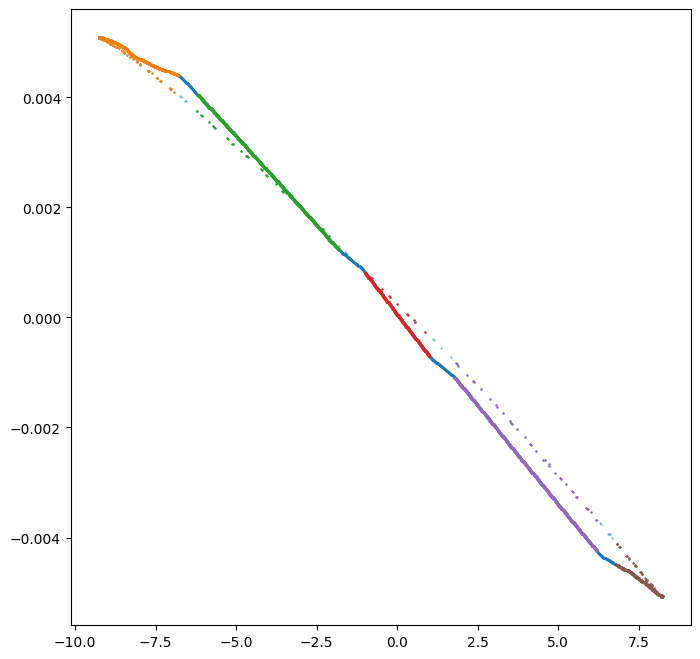

In [24]:
def sampling(time):
    hertz = 100e6
    size = time*hertz 
    if size <= 8192:
        return size,hertz
    else: 
        size = 8192
        hertz = size/time
        print(size,hertz)
        return size,round(hertz)

def config_measurement(zoroku,freq,Vin=5.):
    ad2.config_wavegen(zoroku, 
                frequency=freq,
                amplitude=Vin, # Vin : Voltage range to observe.
                symmetry = 100,
                signal_shape= dwfc.funcTriangle
                )
    t_mes = 10/freq
    rate,size = sampling(t_mes)
    ad2.config_oscilloscope(zoroku,
        range0=23,
        range1=23,
        sample_rate = rate,
        sample_size = size
        )
    
########## End of Function Defining ##########

fig = plt.figure(figsize=(8,8))
grid = gs.GridSpec(1,1,wspace=0.1,)

freq = 100
v_range =10
config_measurement(zoroku,freq,v_range)#,v_range)

ad2.start_wavegen(zoroku,channel=0)
time.sleep(0.2)
T,Ch1,Ch2 = ad2.measure_oscilloscope(zoroku)
ad2.stop_wavegen(zoroku,channel=0)
x = Ch2-Ch1
y = Ch2/220
s=x.argsort()
x=x[s]
y=y[s]
plt.scatter(x,y, s=0.1)
cut1x=x[(x > -10) & (x < -6.8)]
cut2x=x[(x > -6.2) & (x < -1.8)]
cut3x=x[(x > -1) & (x < 1)]
cut4x=x[(x > 1.8) & (x < 6.2)]
cut5x=x[(x > 6.8) & (x < 10)]

cut1y=y[(x > -10) & (x < -6.8)]
cut2y=y[(x > -6.2) & (x < -1.8)]
cut3y=y[(x > -1) & (x < 1)]
cut4y=y[(x > 1.8) & (x < 6.2)]
cut5y=y[(x > 6.8) & (x < 10)]
plt.scatter(cut1x,cut1y,s=0.5)
plt.scatter(cut2x,cut2y,s=0.5)
plt.scatter(cut3x,cut3y,s=0.5)
plt.scatter(cut4x,cut4y,s=0.5)
plt.scatter(cut5x,cut5y,s=0.5)
#-1~+1V
#+1.8~+6.2V
#+6.6~+8.2V

In [25]:
from scipy.optimize import curve_fit
from math import sqrt
def linear(x,a,b):
    return a*x+b
popt1,pcov1=curve_fit(linear,cut1x,cut1y)
popt2,pcov2=curve_fit(linear,cut2x,cut2y)
popt3,pcov3=curve_fit(linear,cut3x,cut3y)
popt4,pcov4=curve_fit(linear,cut4x,cut4y)
popt5,pcov5=curve_fit(linear,cut5x,cut5y)

parameters1 = [popt1[0], popt1[1]]
error1 = [sqrt(pcov1[0][0]), sqrt(pcov1[1][1])]
print("region 1 parameters: ", parameters1, "\nerror:", error1)

parameters2 = [popt2[0], popt2[1]]
error2 = [sqrt(pcov2[0][0]), sqrt(pcov2[1][1])]
print("region 2 parameters: ", parameters2, "\nerror:", error2)

parameters3 = [popt3[0], popt3[1]]
error3 = [sqrt(pcov3[0][0]), sqrt(pcov3[1][1])]
print("region 3 parameters: ", parameters3, "\nerror:", error3)

parameters4 = [popt4[0], popt4[1]]
error4 = [sqrt(pcov4[0][0]), sqrt(pcov4[1][1])]
print("region 4 parameters: ", parameters4, "\nerror:", error4)

parameters5 = [popt5[0], popt5[1]]
error5 = [sqrt(pcov5[0][0]), sqrt(pcov5[1][1])]
print("region 5 parameters: ", parameters5, "\nerror:", error5)


fitted_function1 = linear(cut1x, parameters1[0], parameters1[1])
sse1 = np.sum((cut1y - fitted_function1)*(cut1y - fitted_function1))
sst1 = np.sum((cut1y - np.mean(cut1y))*(cut1y - np.mean(cut1y)))
R_squared1 = 1 - sse1/sst1
print("Region 1 R squared is", R_squared1)

fitted_function2 = linear(cut2x, parameters2[0], parameters2[1])
sse2 = np.sum((cut2y - fitted_function2)*(cut2y - fitted_function2))
sst2 = np.sum((cut2y - np.mean(cut2y))*(cut2y - np.mean(cut2y)))
R_squared2 = 1 - sse2/sst2
print("Region 2 R squared is", R_squared2)

fitted_function3 = linear(cut3x, parameters3[0], parameters3[1])
sse3 = np.sum((cut3y - fitted_function3)*(cut3y - fitted_function3))
sst3 = np.sum((cut3y - np.mean(cut3y))*(cut3y - np.mean(cut3y)))
R_squared3 = 1 - sse3/sst3
print("Region 3 R squared is", R_squared3)

fitted_function4 = linear(cut4x, parameters4[0], parameters4[1])
sse4 = np.sum((cut4y - fitted_function4)*(cut4y - fitted_function4))
sst4 = np.sum((cut4y - np.mean(cut4y))*(cut4y - np.mean(cut4y)))
R_squared4 = 1 - sse4/sst4
print("Region 4 R squared is", R_squared4)

fitted_function5 = linear(cut5x, parameters5[0], parameters5[1])
sse5 = np.sum((cut5y - fitted_function5)*(cut5y - fitted_function5))
sst5 = np.sum((cut5y - np.mean(cut5y))*(cut5y - np.mean(cut5y)))
R_squared5 = 1 - sse5/sst5
print("Region 5 R squared is", R_squared5)


region 1 parameters:  [-0.0003109915628291059, 0.002239142243559712] 
error: [1.4636235422784465e-06, 1.1899747358155574e-05]
region 2 parameters:  [-0.0006426348880057924, 7.632208606167773e-05] 
error: [4.0799740327538005e-07, 1.7144420522306671e-06]
region 3 parameters:  [-0.0007607422870652298, 5.812862589869621e-05] 
error: [1.4043739353311256e-06, 8.092813999672029e-07]
region 4 parameters:  [-0.000714723078668394, 0.00018914156163388841] 
error: [1.1051271186974869e-06, 4.63930426860891e-06]
region 5 parameters:  [-0.00043947118381233485, -0.0014572025933050111] 
error: [2.3457786939313883e-06, 1.8241179559405637e-05]
Region 1 R squared is 0.9761729691826512
Region 2 R squared is 0.9992069740966055
Region 3 R squared is 0.9969015996065415
Region 4 R squared is 0.9952387255851727
Region 5 R squared is 0.9729447691428011


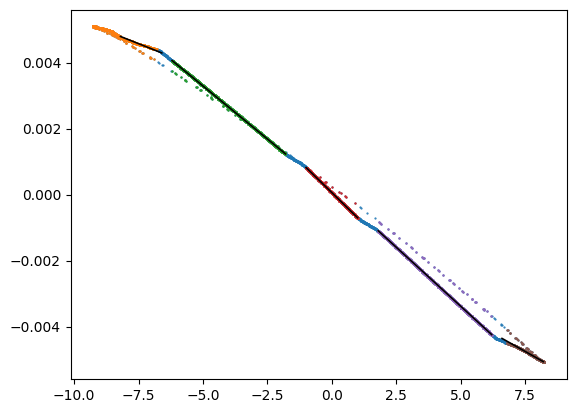

In [26]:
#-8.2~-6.6
#-6.2~-1.8
#-1~+1V
#+1.8~+6.2V
#+6.6~+8.2V
plt.scatter(x,y,s=0.3)
plt.scatter(cut1x,cut1y,s=0.5)
plt.scatter(cut2x,cut2y,s=0.5)
plt.scatter(cut3x,cut3y,s=0.5)
plt.scatter(cut4x,cut4y,s=0.5)
plt.scatter(cut5x,cut5y,s=0.5)
reg1=np.linspace(-8.2,-6.6,10)
reg2=np.linspace(-6.2,-1.8,10)
reg3=np.linspace(-1,1,10)
reg4=np.linspace(1.8,6.2,10)
reg5=np.linspace(6.6,8.2,10)
plt.plot(reg1, linear(reg1, parameters1[0], parameters1[1]),
    linestyle="-",
    linewidth=1.2,
    color="k")
plt.plot(reg2, linear(reg2, parameters2[0], parameters2[1]),
    linestyle="-",
    linewidth=1.2,
    color="k")
plt.plot(reg3, linear(reg3, parameters3[0], parameters3[1]),
    linestyle="-",
    linewidth=1.2,
    color="k")
plt.plot(reg4, linear(reg4, parameters4[0], parameters4[1]),
    linestyle="-",
    linewidth=1.2,
    color="k")
plt.plot(reg5, linear(reg5, parameters5[0], parameters5[1]),
    linestyle="-",
    linewidth=1.2,
    color="k")
plt.show()
import pickle
data=np.vstack((x,y))
with open("chua diode data.pkl",'wb') as handle:
    pickle.dump(data,handle,protocol=pickle.HIGHEST_PROTOCOL)

220
Data up to resistor 220 has been collected and saved.
22000
Data up to resistor 22000 has been collected and saved.


C:\Users\chwan\AppData\Local\Temp\ipykernel_35400\725285185.py:70: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


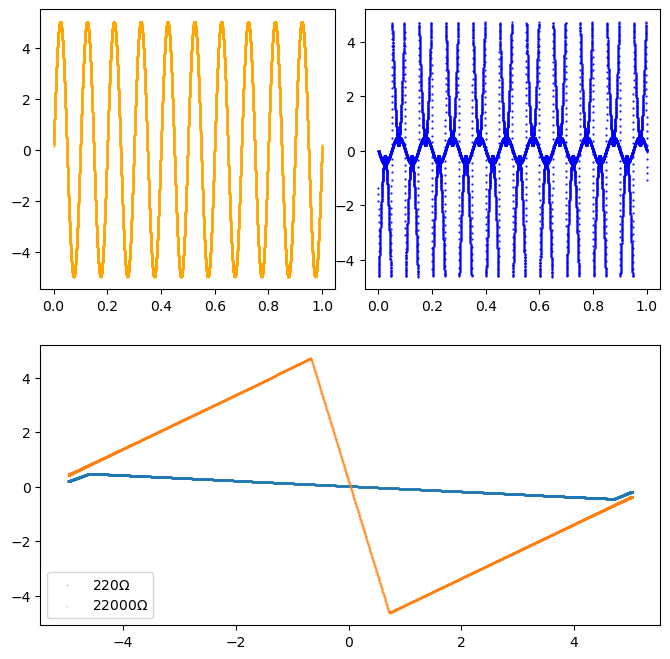

In [12]:
# Collect data for separate NICs

def linear(x,a,b):
    return a*x+b

def sampling(time):
    hertz = 100e6
    size = time*hertz 
    if size <= 8192:
        return size,hertz
    else: 
        size = 8192
        hertz = size/time
        return size,round(hertz)

def config_measurement(zoroku,tmes,Vin=5.):
    ad2.config_wavegen(zoroku, 
                frequency=1/tmes,
                amplitude=Vin, # Vin : Voltage range to observe.
                signal_shape= dwfc.funcSine
                )
    rate,size = sampling(tmes)
    ad2.config_oscilloscope(zoroku,
        range0=23,
        range1=23,
        sample_rate = rate,
        sample_size= size,
        )
    
########## End of Function Defining ##########

Res = [220,220,2200,22000,22000,3300]
Offset = [6,-6]
data_dict = {"Res":Res,"Vcc":Offset,
             "R1":[],"R4":[]}

tmes = 0.1 # Measurement time

fig = plt.figure(figsize=(8,8))
grid = gs.GridSpec(2,2,wspace=0.1,)

axs1 = plt.subplot(grid[0,0])
axs2 = plt.subplot(grid[0,1])
axs3 = plt.subplot(grid[1,:])

colors = plt.cm.viridis(np.linspace(0, 1, len(Res)))

for i,R_i in enumerate([Res[0],Res[3]]):
    print(R_i)
    config_measurement(zoroku,tmes)
    
    ad2.start_wavegen(zoroku,channel=0)
    time.sleep(0.1)
    T,Ch1,Ch2 = ad2.measure_oscilloscope(zoroku)
    ad2.stop_wavegen(zoroku,channel=0)
    
    data_dict[R_i] = T,Ch1,Ch2
    
    handle = open("NIC_transfer_curve.pkl", 'wb')
    pickle.dump(data_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
    handle.close()

    axs1.scatter(T,Ch1,s=0.3,color="orange")
    axs2.scatter(T,Ch2,s=0.3,color="blue")
    axs3.scatter(Ch1,Ch2,label=fr"{R_i}$\Omega$",s=0.3,alpha=0.3)

    print("Data up to resistor %d has been collected and saved." % R_i)
    input("Switch oscilloscpe position, then press ENTER to measure.")
axs3.legend(loc="lower left")
fig.show()